# Week 8 - Task 3

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the MNIST Fashion dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Define the convolutional autoencoder architecture
input_img = Input(shape=(28, 28, 1))

## 3.a

Epoch 1/50
469/469 [==============================] - 7s 7ms/step - loss: 0.3827 - val_loss: 0.3490
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.3416 - val_loss: 0.3360
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.3488 - val_loss: 0.3479
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3439 - val_loss: 0.3309
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3285 - val_loss: 0.3260
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.3287 - val_loss: 0.3236
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3240 - val_loss: 0.3740
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3339 - val_loss: 0.3216
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3197 - val_loss: 0.3209
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.3294 - val_loss: 0.3230

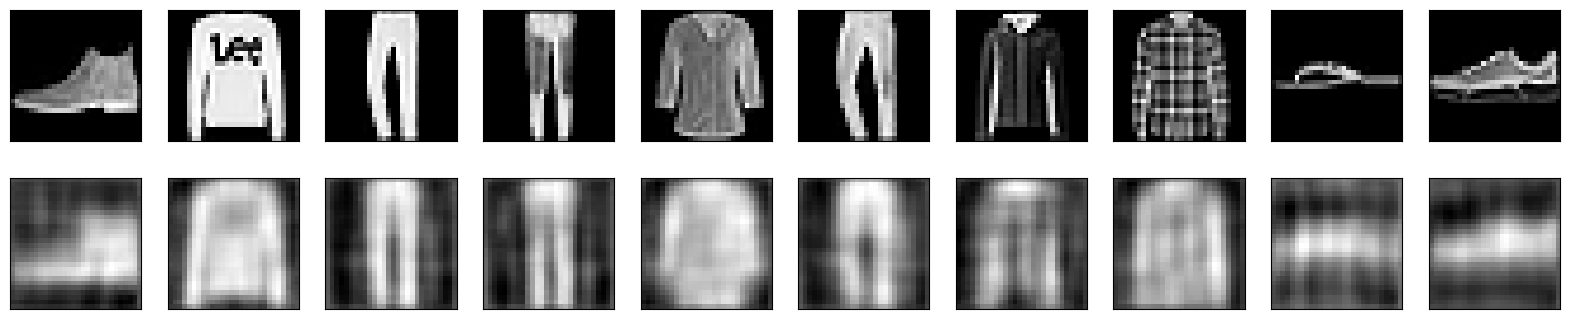

In [3]:
# Encoder
x = Conv2D(16, (3, 3), activation='linear', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='linear', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='linear', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='linear', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='linear', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='linear')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='linear', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some images from the test set
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = encoded_imgs

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## 3.b

**non-linear activation function**

Epoch 1/50
469/469 [==============================] - 5s 8ms/step - loss: 0.3402 - val_loss: 0.3129
Epoch 2/50
469/469 [==============================] - 4s 9ms/step - loss: 0.3051 - val_loss: 0.3026
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2982 - val_loss: 0.2979
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.2943 - val_loss: 0.2947
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.2916 - val_loss: 0.2924
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2895 - val_loss: 0.2906
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.2878 - val_loss: 0.2894
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.2864 - val_loss: 0.2878
Epoch 9/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2852 - val_loss: 0.2868
Epoch 10/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2841 - val_loss: 0.2857

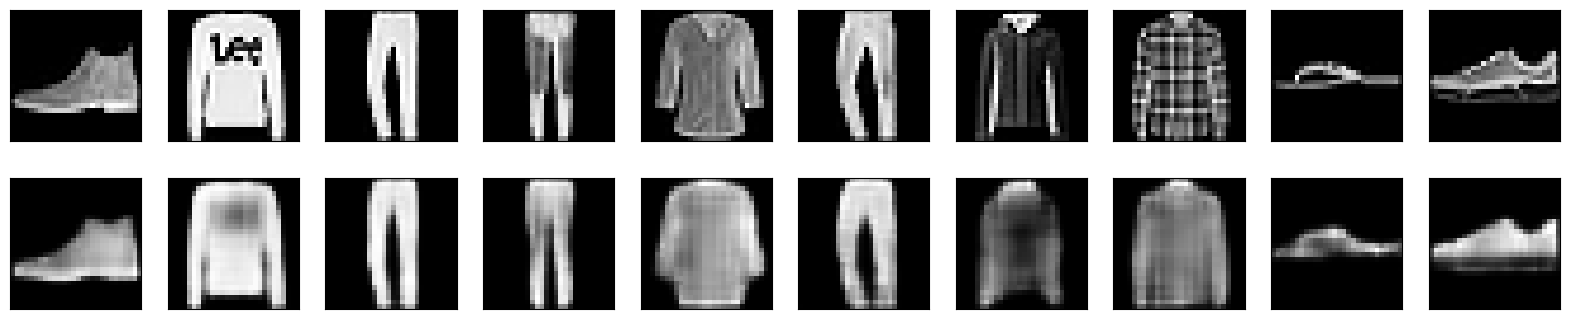

In [2]:
# Encoder
x = Conv2D(16, (3, 3), activation='tanh', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='tanh', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='tanh', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='tanh', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='tanh', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='tanh')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some images from the test set
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = encoded_imgs

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()